In [12]:
import spacy
import itertools
import re
import numpy as np
import matplotlib.pyplot as plt
import en_core_web_sm

# all_mcu_scripts.txt is a compilation of all Marvel Cinematic Universe movie scripts
with open('/content/sample_data/all_mcu_scripts.txt', 'r') as file:
    text = file.read()
nlp = en_core_web_sm.load()
nlp.max_length=2234558
doc = nlp(text)

In [13]:
def create_plot(data, figure, category):
    #data: data to plot
    #figure: title
    #category: type of data used
    
    #plot formatting
    plt.bar(["\"{}\"".format(i[0]) for i in data], [i[1] for i in data],color=['red','gold'])
    plt.title("Top {} ({})".format(category, figure.title()))
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60, fontsize=14)
    plt.subplots_adjust(bottom=0.2)
    plt.show()
    plt.close()

In [14]:
def top_terms(doc, kind, count, figure=""):
    #doc: spaCy doc
    #kind: VERB, NOUN, ADJ, or AD
    #count: how many pos
    #figure: name of figure
    
    pos = {}
    for token in doc:        
        if token.pos_== kind:
            if token.is_stop:
                continue
            if token.lemma_ in pos:
                pos[token.lemma_] += 1
            else:
                pos[token.lemma_] = 1

    # sort by values 
    # only get keys where value is greater than 1;
    result = sorted({k: v for (k, v) in pos.items() if v > 1}.items(),
                    key=lambda kv: kv[1], reverse=True)[:count]

    create_plot(result, figure, kind)

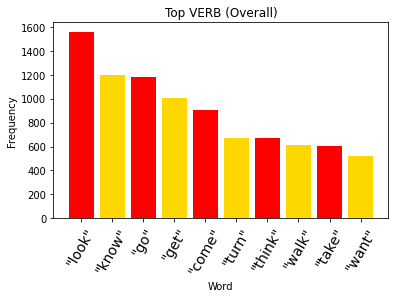

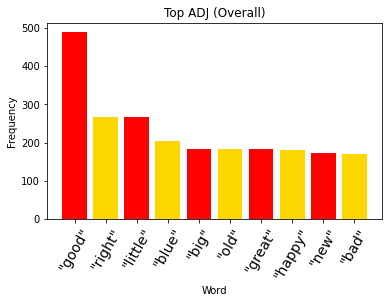

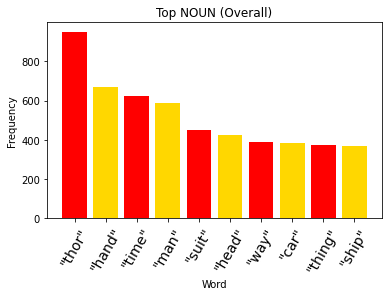

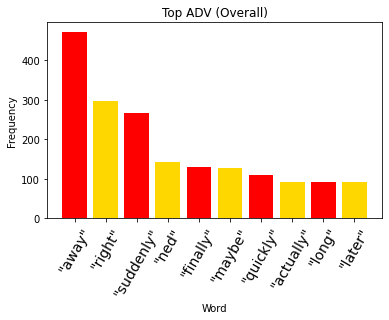

In [15]:
pos = ['VERB','ADJ','NOUN','ADV']
for i in pos:
  top_terms(doc, i, 10, "overall")


**Top verbs and nouns mentioned by a particular character**

In [16]:
def top_ents(doc, count, figure=""):
    #doc: spaCy doc
    #count: how many entities
    #figure: name of the figure
    
    entities = {}
    for entity in doc.ents:
        # Print the entity text and its label
        if entity.text in entities:
            entities[entity.text] += 1
        else:
            entities[entity.text] = 1
    data = sorted(entities.items(), key=lambda kv: kv[1], reverse=True)[:count]

    plt.bar(["\"{}\"".format(i[0]) for i in data], [i[1] for i in data], color=['red','gold'])
    plt.title("Top {} named entitites ({})".format(count, figure.title()))    
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60, fontsize=14)
    plt.subplots_adjust(bottom=0.2)
    plt.show()
    plt.close()

In [19]:
def all_terms_subject(nlp):
    # most popular mcu characters chosen as subjects
    subjects = ['thor', 'tony stark', 'steve rogers','natasha romanoff',
                'peter parker']
    subject_docs = {}

    for subject in subjects:
        with open('/content/sample_data/all_mcu_scripts.txt', 'r') as file:
            # list contains all lines said by subject
            subject_lines = []
            for line in file:
                if line.lower().startswith(subject):
                    # remove subject
                    subject_lines.append(re.sub(r'.*:', '', line.lower()))
        doc = nlp('\n'.join(subject_lines))
        pos = ['VERB','ADJ','NOUN','ADV']
        print("TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY", subject,":")
        for i in pos:
            top_terms(doc, i, 10, subject)        
        print("TOP 10 TERMS BY", subject,":")
        top_ents(doc, 10, subject)
        subject_docs[subject] = doc

    return subject_docs

TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY thor :


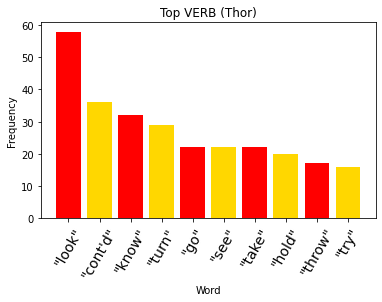

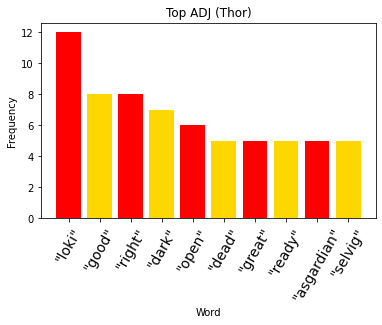

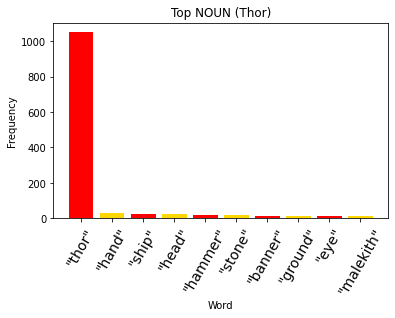

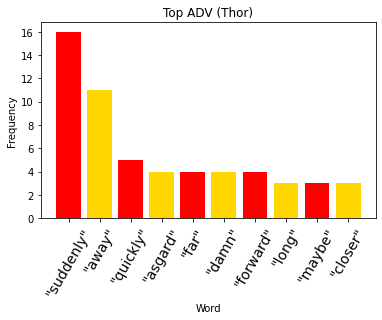

TOP 10 TERMS BY thor :


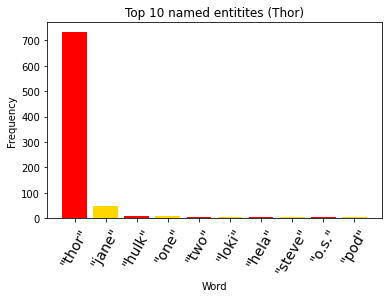

TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY tony stark :


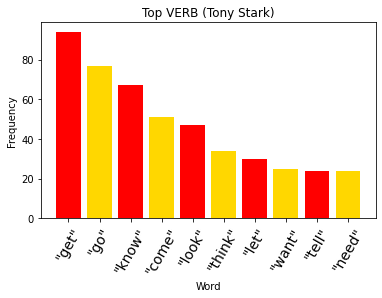

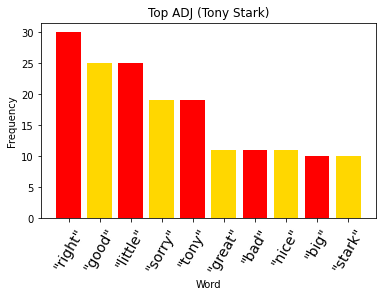

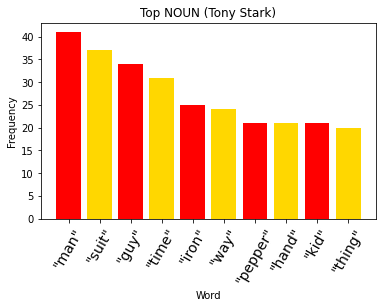

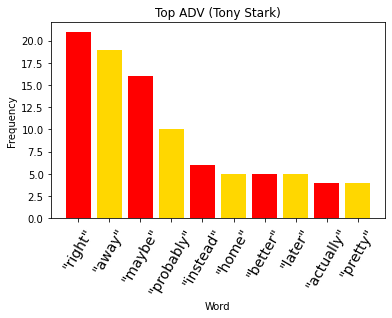

TOP 10 TERMS BY tony stark :


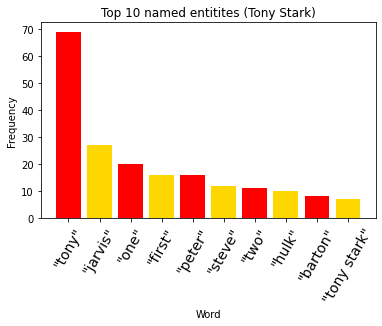

TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY steve rogers :


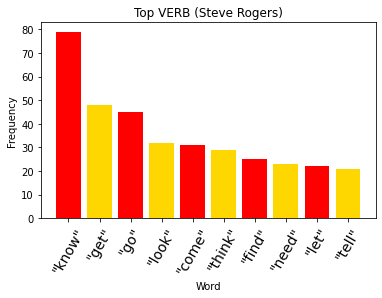

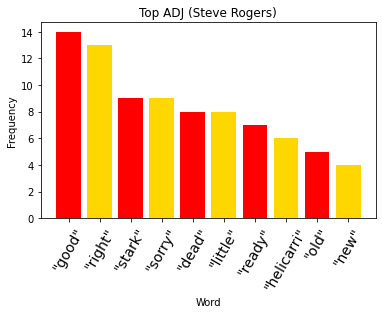

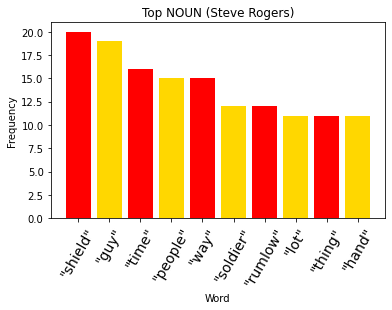

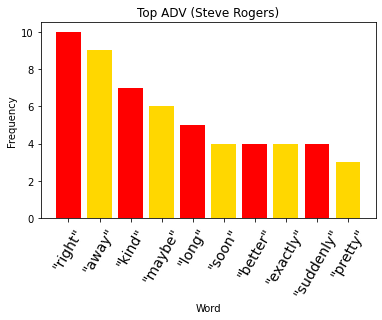

TOP 10 TERMS BY steve rogers :


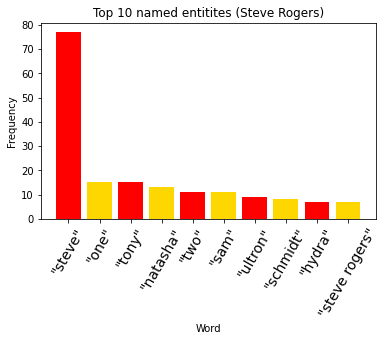

TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY natasha romanoff :


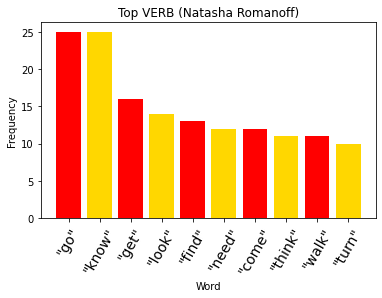

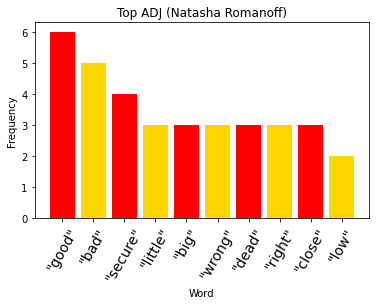

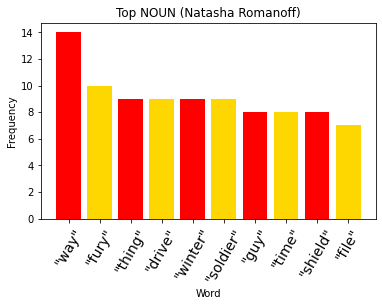

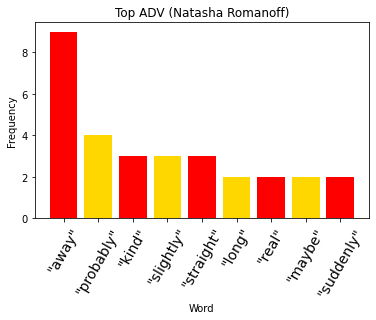

TOP 10 TERMS BY natasha romanoff :


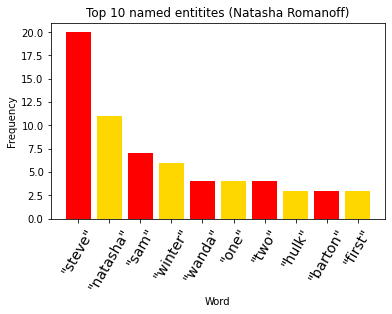

TOP 10 VERBS, NOUNS, ADJECTIVES, ADVERBS BY peter parker :


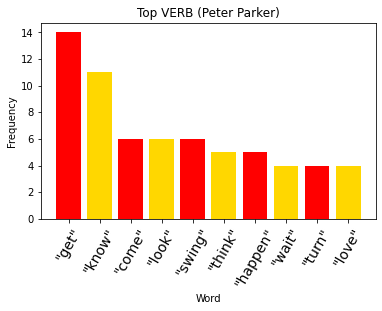

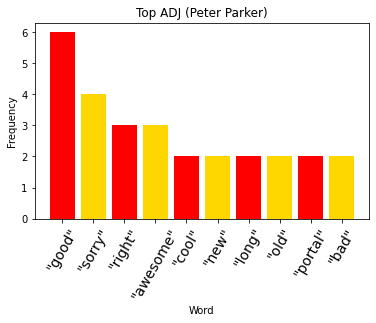

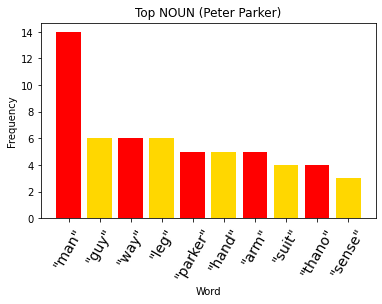

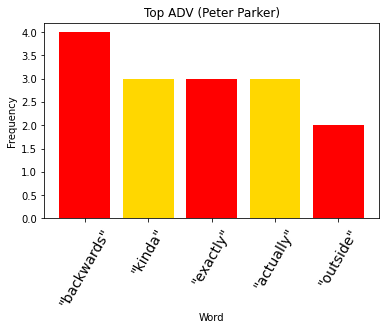

TOP 10 TERMS BY peter parker :


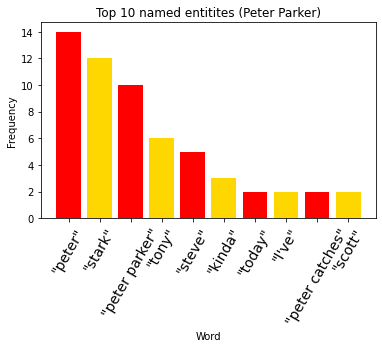

In [20]:
subject_docs = all_terms_subject(nlp)

In [21]:
def create_sim_matrix(subject_docs):
    # gives similarity score between 0 and 1, close to 1 means more similarity
    # similarity score determined by top terms by character
    subjects_num = len(subject_docs)
    sim_matrix = np.full((subjects_num, subjects_num), fill_value=1.0)

    for a, b in itertools.product(enumerate(subject_docs), repeat=2):
        sim_score = subject_docs[a[1]].similarity(subject_docs[b[1]])
        sim_matrix[a[0], b[0]] = sim_score

    plt.matshow(sim_matrix, interpolation='nearest')
    plt.xticks(range(subjects_num), subject_docs.keys(), rotation=90)
    plt.yticks(range(subjects_num), subject_docs.keys())
    plt.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    plt.title("Marvel Character's Similarity Matrix")
    plt.colorbar(orientation="vertical", pad=0.2)
    plt.show()
    plt.close()

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if

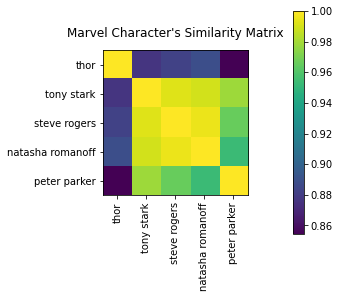

In [ ]:
create_sim_matrix(subject_docs)

**Top named entities**

In [24]:
def top_terms_all(nlp, count, figure=""):
    terms = {}
    for ent in doc.ents:
        if ent.text in terms:
            terms[ent.text] += 1
        else:
            terms[ent.text] = 1
        result = sorted(terms.items(), key=lambda kv: kv[1], reverse=True)[:30]

    plt.bar(["\"{}\"".format(i[0]) for i in result], [i[1] for i in result], color=['red','gold'])
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.xticks(rotation=90, fontsize=12)
    plt.title("Top named terms (Overall)".format(count, figure.title()))
    plt.subplots_adjust(bottom=0.20)
    plt.show()
    plt.close()

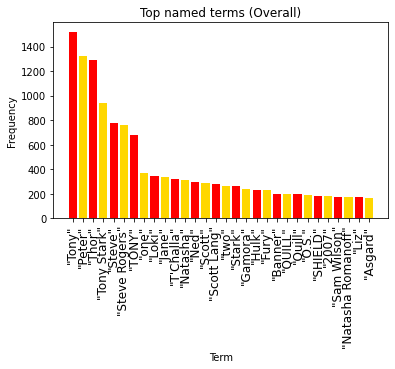

In [25]:
entities = top_terms_all(nlp, 10)